# TP 3 : Diabetes databases

# IMPORT DATA

In [40]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  # for plots
from matplotlib import rc
from os import mkdir, path
from functools import partial  # functions that act on or return other function
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV, Lasso, \
    lasso_path
from sklearn.linear_model import enet_path
from matplotlib.patches import Polygon, Circle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stat
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn import cross_validation
from sklearn.model_selection import KFold
import warnings
%matplotlib notebook
np.random.seed(seed=10)

warnings.filterwarnings('ignore')

# Exploring dataset

In [2]:
#diabetes1 = pd.read_csv('https://bitbucket.org/portierf/shared_files/downloads/data_dm3.csv',header=None)
diabetes1 = pd.read_csv('data_dm3.csv',header=None)
diabetes1.head()

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
0,-1.298173,-0.162249,1.223379,1.355554,1.080171,0.634979,0.298741,0.548270,0.731773,1.018645,...,0.588278,0.210106,1.861458,-0.436399,0.279299,-1.416020,-2.332363,0.215096,-0.693319,151.0
1,0.166951,-0.338060,-0.618867,0.759366,1.134281,-0.536844,-0.075120,0.970251,-0.327487,0.717310,...,-0.251054,-0.825716,0.339139,1.119430,0.225958,-0.822288,0.382838,-0.718829,-0.188993,75.0
2,-0.416177,-0.205659,-1.282226,1.675500,1.523746,0.192029,-0.235840,-1.954626,-0.853309,0.892791,...,1.283837,0.372516,-0.652557,-2.579347,0.139267,-1.901196,0.048210,0.220205,0.471588,141.0
3,0.867184,-0.398667,0.093501,0.025971,1.852099,0.789774,0.801775,0.376711,0.853689,0.247953,...,0.446582,0.334733,0.399074,-0.884172,0.723819,1.316367,0.088218,0.619496,1.061662,206.0
4,1.193282,-0.936980,-0.725039,0.766078,0.223489,-1.584622,1.146866,0.086136,-0.088780,-0.945066,...,0.786157,-1.058179,-0.155788,-0.642504,2.040010,-1.703110,-1.901502,1.778811,-0.489853,135.0


# QUESTION 1

Nombre d'observations et variables explicatives

In [3]:
#Variable à expliquer
Y_a_expliquer=diabetes1.iloc[:,-1]
print('Le nombre d\'observations est de {:.0f} .'.format(len(Y_a_expliquer)))
print('Le nombre de variables explicatives est de {:.0f} .'.format(len(diabetes1.iloc[1,:])))

Le nombre d'observations est de 442 .
Le nombre de variables explicatives est de 211 .


# QUESTION 2

## Scatter plot de la base de données

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

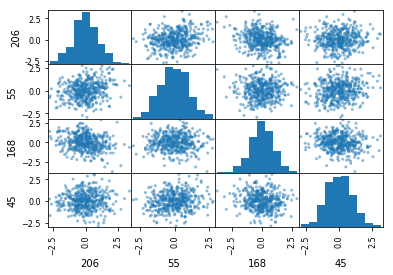

In [4]:
from random import randint
r=[]
plt.clf()
plt.figure()
for i in range(4):
    r.append(randint(0,len(diabetes1.iloc[1,:])))    
diabetes=diabetes1.iloc[:,0:-1]
#covariable_index=np.random()
X_explicatives=diabetes.iloc[:,r]
pd.plotting.scatter_matrix(X_explicatives)
plt.show();

In [5]:
for i in range(0,4):
    labels=['1','2','3','4']
    print("La covariable {:s} a pour espérance {:.4f} et pour variance {:.4f}".format(str(labels[i]),np.mean(X_explicatives.iloc[:,i]),np.var(X_explicatives.iloc[:,i])))
print("La variable à expliquer a pour espérance {:.0f} et pour variance {:.0f}".format(np.mean(Y_a_expliquer),np.var(Y_a_expliquer)))

La covariable 1 a pour espérance 0.0000 et pour variance 1.0000
La covariable 2 a pour espérance 0.0000 et pour variance 1.0000
La covariable 3 a pour espérance -0.0000 et pour variance 1.0000
La covariable 4 a pour espérance 0.0000 et pour variance 1.0000
La variable à expliquer a pour espérance 152 et pour variance 5930


Les covariables sont centrées et normalisées car leur espérance est égale à 0 et variance égale à 1.
Cependant la variable à expliquer n'est ni centré, ni normalisée.


## Covariables centrées

Text(0.5,1,'Covariables centrées')

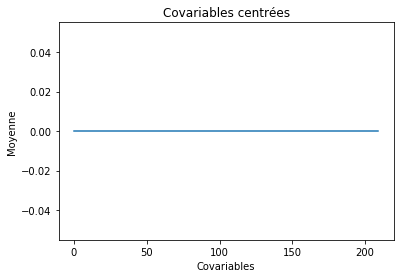

In [6]:
plt.figure()
plt.plot(round(np.mean(diabetes1.iloc[:,0:-1])))
plt.xlabel("Covariables")
plt.ylabel("Moyenne")
plt.title("Covariables centrées")

Text(0.5,1,'Covariables normalisées')

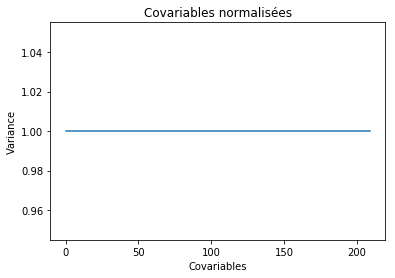

In [7]:
plt.figure()
plt.plot(round(np.var(diabetes1.iloc[:,0:-1])))
plt.xlabel("Covariables")
plt.ylabel("Variance")
plt.title("Covariables normalisées")

# QUESTION 3

Echantillon d'apprentissage

In [8]:
from sklearn.model_selection import train_test_split
Y_a_expliquer=diabetes1.iloc[:,-1]
X=diabetes1.iloc[:,0:-1]
#SPLIT DATA
#Sample data for test
X_train, X_test, y_train, y_test = train_test_split(diabetes1.iloc[:,0:-1],diabetes1.iloc[:,-1], test_size = 0.2, random_state = 1)#, shuffle=True)
print("La taille de l'échantillon pour entrainer le modèle est {:.0f} .".format(len(X_train)))
print("La taille de l'échantillon pour tester le modèle la taille est {:.0f} .".format(len(X_test)))

La taille de l'échantillon pour entrainer le modèle est 353 .
La taille de l'échantillon pour tester le modèle la taille est 89 .


# QUESTION 4

## Matrice de covariance

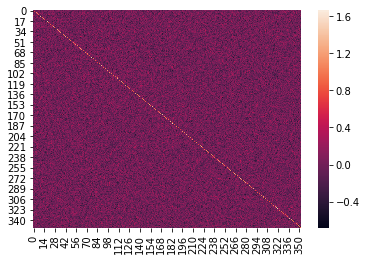

In [9]:
sns.heatmap(np.cov(X_train))
# cov=np.dot(np.transpose(X_train),X_train)

## Matrice de corrélation et valeurs propres

In [10]:
#Calcul de la matrice de corrélation (=BCB (B=Diag(1/sigma(i))) where sigma is standard deviation)
corr=X_train.corr()
#Calcul des valeurs propres et vecteurs propres
e=np.linalg.eigh(corr)
vecteurs_propres=np.linalg.eigh(corr)[1]

Text(0.5,1,'Décroissance valeurs propres')

<Figure size 432x288 with 0 Axes>

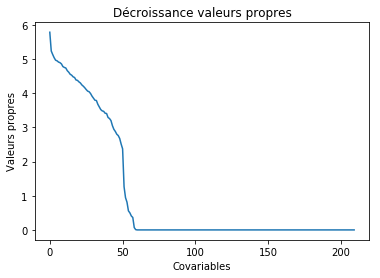

In [11]:
#Graphe de la décroissance des valeurs propres
plt.clf()
plt.figure()
#plt.plot(abs(np.sort(-e[0])))
plt.plot(sorted(e[0],reverse=True))
plt.xlabel("Covariables")
plt.ylabel("Valeurs propres")
plt.title("Décroissance valeurs propres")

Il est légitime de ne garder que les 60 premières variables de l'ACP . En effet les autres variables ont des valeurs propres égales à 0, ainsi cela signifie qu'elles sont le résultat d'une combinaison linéaire de ces 60 variables.

# QUESTION 5

## PCA BEFORE OLS

Text(0.5,1,'OLS AVEC ACP')

<Figure size 432x288 with 0 Axes>

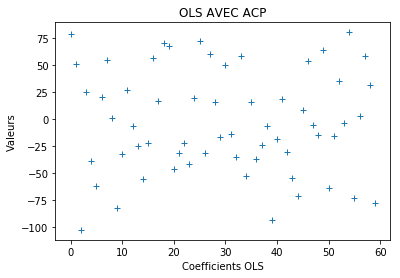

In [12]:
plt.clf()
plt.figure()
X_acp=np.dot(X_train,np.transpose(vecteurs_propres[150:]))
lin_reg_acp = linear_model.LinearRegression()
lin_reg_acp.fit(X_acp , y_train)
plt.plot(lin_reg_acp.coef_,'+')
plt.xlabel("Coefficients OLS")
plt.ylabel("Valeurs")
plt.title("OLS AVEC ACP")

# OLS

Text(0.5,1,'OLS')

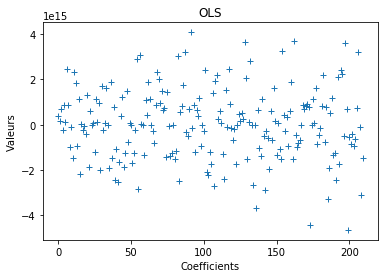

In [13]:
plt.figure()
X_no_acp=X_train
lin_reg_no_acp = linear_model.LinearRegression()
lin_reg_no_acp.fit(X_no_acp, y_train)
plt.plot(lin_reg_no_acp.coef_,'+')
plt.xlabel("Coefficients")
plt.ylabel("Valeurs")
plt.title("OLS")

# QUESTION 6

In [14]:
#INTERCEPT POUR OLS AVEC ACP
print("L'intercept pour l'OLS AVEC ACP est {:.4f}".format(lin_reg_acp.intercept_))
#INTERCEPT POUR OLS SANS ACP
print("L'intercept pour l'OLS SANS ACP est {:.4f}".format(lin_reg_no_acp.intercept_))

L'intercept pour l'OLS AVEC ACP est 150.5831
L'intercept pour l'OLS SANS ACP est 150.9744


Les données utilisées ne sont pas normalisées, celà explique pourquoi l'intercept n'est pas exactement égal à la moyenne de la variable à expliquer.

## Normalisation

In [15]:
#Normaliser X_train
X_train_scaled= preprocessing.scale(X_train,with_mean='True', with_std='True')
X_acp_scaled= preprocessing.scale(X_acp,with_mean='True', with_std='True')
lin_reg = linear_model.LinearRegression()
lin_reg3 = linear_model.LinearRegression()
lin_reg.fit(X_train_scaled , y_train)
lin_reg3.fit(X_acp_scaled , y_train)
#INTERCEPT POUR OLS SANS ET AVEC ACP 
##print("L'intercept pour l'OLS SANS ACP et données normalisés est {:.4f}".format(lin_reg.intercept_))
print("L'intercept pour l'OLS AVEC ACP et données normalisés est {:.4f}".format(lin_reg3.intercept_))

L'intercept pour l'OLS AVEC ACP et données normalisés est 153.3768


In [16]:
#Moyenne de Y_train
print("La moyenne de la variable à expliquer est {:.4f}".format(np.mean(y_train)))

La moyenne de la variable à expliquer est 153.3768


Commentaire : On retrouve bien après normalisation, le résultat attendu .i.e. l'intercept qui est égal à la moyenne de la variable à expliquer.

# QUESTION 7

## Modèle OLS 

Le risque de prédiction est 4208 
Le coefficient de détermination est 0.2103


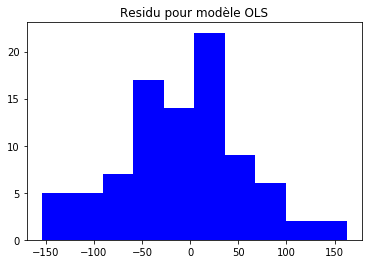

In [17]:
from sklearn.metrics import r2_score, mean_squared_error
plt.figure()
X_no_acp=X_train
lin_reg_no_acp = linear_model.LinearRegression()
lin_reg_no_acp.fit(X_no_acp, y_train)
Y_predi_no_acp=lin_reg_no_acp.predict(X_test)
residu_no_acp=Y_predi_no_acp-y_test

plt.hist(residu_no_acp,color="b")
plt.title("Residu pour modèle OLS")
risque_prediction_no_acp=(np.linalg.norm(residu_no_acp))
R2_no_acp=r2_score(y_test,Y_predi_no_acp)

risque_prediction_no_acp=mean_squared_error(y_test,Y_predi_no_acp)

print("Le risque de prédiction est {:.0f} ".format(risque_prediction_no_acp))
print("Le coefficient de détermination est {:.4f}".format(R2_no_acp))

## Modèle OLS with ACP

Le risque de prédiction est 3738 
Le coefficient de détermination est 0.2985


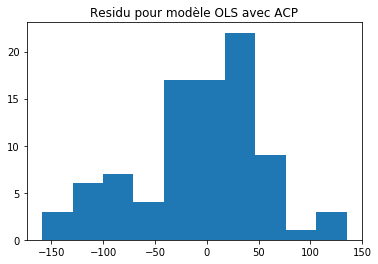

In [18]:
plt.figure()
X_test_acp=np.dot(X_test,np.transpose(vecteurs_propres[150:]))
Y_predi_acp=lin_reg_acp.predict(X_test_acp)
residu_acp=Y_predi_acp-y_test
risque_prediction_acp=(np.linalg.norm(residu_acp))
plt.hist(residu_acp)
plt.title("Residu pour modèle OLS avec ACP")
R2_acp=r2_score(y_test,Y_predi_acp)
R2_acp
risque_prediction_acp=mean_squared_error(y_test,Y_predi_acp)
print("Le risque de prédiction est {:.0f} ".format(risque_prediction_acp))
print("Le coefficient de détermination est {:.4f}".format(R2_acp))

# QUESTION 8

In [19]:
from scipy.stats import norm
from scipy import stats
diabetes_X_aug = np.column_stack( (np.ones( (X_train.shape[0], 1 )), X_train )) 
p = diabetes_X_aug.shape[1]
n = diabetes_X_aug.shape[0]

test = np.zeros((p,p))
pval_mem = np.zeros(p)
pval = np.zeros((p,p))
resids = y_train

var_sel = []
var_remain = list(range(p))
in_test = []

regr = linear_model.LinearRegression(fit_intercept=False)

for k in range(p): 
    resids_mem = np.zeros((p,n))
    for i in var_remain:
        xtmp = diabetes_X_aug [:,[i]]
        regr.fit(xtmp , resids)
        #calcul de (x'x)
        xx = np.sum( diabetes_X_aug [:,[i]] ** 2 )   
        #print(diabetes_X_aug [:,[i]])
        #print(xx(1,1))
        resids_mem [i,:] = regr.predict(xtmp) - resids
        sigma2_tmp = np.sum (resids_mem [i,:] ** 2) / (xx)
        #print (k, i)
        test[k,i] = np.sqrt(n-1) * np.abs(regr.coef_) / (np.sqrt( sigma2_tmp )) 
        pval[k,i] =   2 * (1 - norm.cdf(test[k,i]))
        #pval[k,i] =   2 * (1-stats.t.cdf(abs(test[k,i] ), n - 1))
        #print(pval)
    ####separe en deux vecteurs la listes des variables séléctionnées et les autres
    best_var = np.argmax(test[k,:])
    var_sel.append(best_var)
    resids = resids_mem[best_var,:]
    pval_mem [k] = pval[k,best_var]
    var_remain = np.setdiff1d(var_remain,var_sel)

print ("La sélection des variables est ordonnée comme ci-dessous: ")
var_sel1=[x-1 for x in var_sel[1:]]
df=pd.DataFrame(var_sel1)
df.columns = ['Variables sélectionnées']

La sélection des variables est ordonnée comme ci-dessous: 


In [20]:
print(df)

     Variables sélectionnées
0                         58
1                        123
2                         84
3                        172
4                         43
5                        187
6                        110
7                        133
8                        208
9                         14
10                        34
11                       159
12                       147
13                       135
14                        41
15                       167
16                       112
17                       134
18                       183
19                        45
20                        39
21                       154
22                       130
23                        47
24                        99
25                       174
26                        77
27                        85
28                        66
29                       178
..                       ...
180                      114
181                      118
182           

# QUESTION 9

## (i) Graphes des statistiques lors de la selection des variables

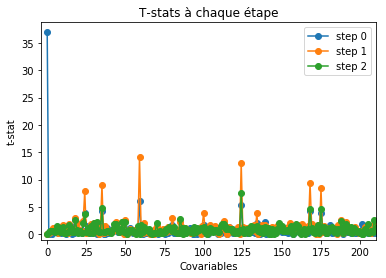

In [21]:
%matplotlib inline
def foo(s1):
    return "step %s" % s1

fig = plt.figure()
for k in range(3): 
    lab_tmp = foo(k)
    plt.plot(np.arange(p),test[k,:], '-o',label = lab_tmp)
    plt.axis(xmin = -4,xmax = 210,ymin = -1)
plt.legend(loc=1)
plt.title("T-stats à chaque étape")
plt.xlabel("Covariables")
plt.ylabel("t-stat")
plt.show()

#filename = 'forw_first_steps'

## (ii) Graphe des 50 premières p_values

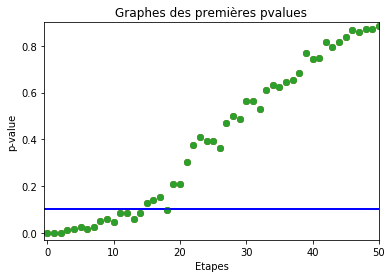

In [22]:
fig2 = plt.figure() 
for k in range(3): 
    #plt.plot(p,pval_mem, 'o')
    plt.plot(np.arange(p),pval_mem, 'o')
    plt.plot([-0.5,50],[.1,.1],color = "blue" )
    plt.axis(xmin = -.5,xmax = 50,ymin = -.03,ymax=0.9)
plt.title("Graphes des premières pvalues")
plt.ylabel("p-value")
plt.xlabel("Etapes")
plt.show()

## (iii) Liste des variables sélectionnées avec critère d'arrêt

In [23]:
#print("variables sélectionnées (dans l'ordre): " , 
var_sel2=np.array(var_sel)[pval_mem<0.1]
var_sel1=[x-1 for x in var_sel2[1:]]
print("Les variables sélectionnées  sont : " , 
var_sel1)

Les variables sélectionnées  sont :  [58, 123, 84, 172, 43, 187, 110, 133, 208, 14, 34, 159, 147, 135, 134]


# QUESTION 10

### Risque de prédiction associé aux variables sélectionnées par le FORWARD SELECTION 

In [24]:
lin_reg3 = linear_model.LinearRegression()
lin_reg3.fit(X_train.iloc[:,list(var_sel1)] , y_train)
Y_predict3=lin_reg3.predict(X_test.iloc[:,list(var_sel1)])
residu=y_test-Y_predict3
risque_prediction=np.linalg.norm(residu)
risque_prediction_3=mean_squared_error(y_test,Y_predict3)
r2_3=r2_score(y_test,Y_predict3)
print("Le risque de prédiction est {:.0f} ".format(risque_prediction_3))

Le risque de prédiction est 3929 


### Comparaison des risques de prédiction avec les autres régressions


In [25]:
print(f" |  Modèle PCA before OLS  |  Modèle OLS  | Modèle forward  |")
print(f" |           {round(risque_prediction_acp,4)}     |   {round(risque_prediction_no_acp,4)}  |     {round(risque_prediction_3,4)}   |")  

 |  Modèle PCA before OLS  |  Modèle OLS  | Modèle forward  |
 |           3738.4002     |   4208.1993  |     3929.1334   |


Le risque de prédiction en utilisant la selection forward est diminué par rapport au modèle classique OLS. 
Par contre le risque de prédiction est meilleur en utilisant la PCA avant OLS.

### Comparaison des coefficients de déterminations

In [26]:
print(" |  Modèle PCA before OLS |  Modèle OLS  | Modèle forward  |")
print(f" |           {round(R2_no_acp,4)}       |   {round(R2_acp,4)}     |     {round(r2_3,4)}      |")  

 |  Modèle PCA before OLS |  Modèle OLS  | Modèle forward  |
 |           0.2103       |   0.2985     |     0.2627      |


Ici aussi la PCA avant OLS est meilleure.

# QUESTION 11

Préparer la validation croisée en divisant notre échantillon train en 4 folds (échantillons).

In [27]:
kf = KFold(4, shuffle=True)
a=kf.get_n_splits(X_train)
kf.split(X_train.values)
sample_train=[]
for  iteration, data  in enumerate(kf.split(X_train)):
    print("")
    print("L\'échantillon numero {:.0f} est".format(iteration))
    sample_train.append(data[1])
    print(data[1])


L'échantillon numero 0 est
[  1   6  12  17  20  24  25  26  27  29  34  43  47  52  56  57  64  65
  69  76  78  80  87  88  92  97 100 102 105 110 113 114 121 126 130 138
 139 142 146 147 148 151 152 163 164 167 170 172 173 174 175 181 183 189
 197 202 205 211 215 218 219 225 227 229 231 247 257 264 266 272 277 278
 280 282 296 301 303 310 314 317 325 334 335 336 338 340 343 345 351]

L'échantillon numero 1 est
[  0   5  10  19  21  35  36  37  38  46  49  50  55  58  59  60  61  63
  68  70  75  81  83  86  98 104 106 108 111 119 127 129 131 132 154 157
 160 184 186 187 188 191 193 194 195 196 199 204 207 208 210 217 222 223
 230 236 238 240 241 242 249 251 254 258 259 261 263 267 269 270 276 285
 291 293 295 300 305 306 308 309 322 324 332 333 341 342 349 352]

L'échantillon numero 2 est
[  2   7   9  22  28  30  32  39  41  48  53  66  67  72  82  84  90  91
  95  96  99 101 103 107 109 115 116 117 120 124 136 137 144 149 153 155
 159 161 162 166 168 169 171 176 180 190 192 198 2

# QUESTION 12

In [28]:
from sklearn.model_selection import train_test_split
Y_a_expliquer=diabetes1.iloc[:,-1]
X=diabetes1.iloc[:,0:-1]
#SPLIT DATA
#Sample data for test
X_train, X_test, y_train, y_test = train_test_split(diabetes1.iloc[:,0:-1],diabetes1.iloc[:,-1], test_size = 0.2, random_state = 1)#, shuffle=True)
print("La taille de l'échantillon pour entrainer le modèle est {:.0f} .".format(len(X_train)))
print("La taille de l'échantillon pour tester le modèle la taille est {:.0f} .".format(len(X_test)))

La taille de l'échantillon pour entrainer le modèle est 353 .
La taille de l'échantillon pour tester le modèle la taille est 89 .


## Calcul du paramètre de régularisation alpha

<Figure size 432x288 with 0 Axes>

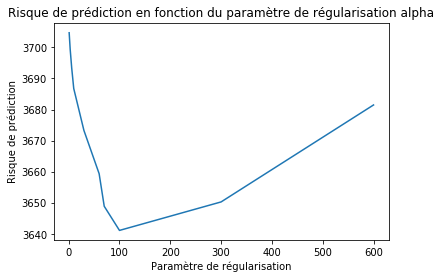

La valeur du risque minimal est 3641.0 associée à alpha égal à 100


In [29]:
kf = KFold(4, shuffle=False)
from collections import defaultdict
from sklearn.linear_model import Ridge, RidgeCV
eps = 1e-3
X=X_train
y=y_train
alpha_max = 1e3
n_alphas = 100
#alphas = np.logspace(np.log10(alpha_max * eps),
                    #np.log10(alpha_max), num=n_alphas)
alphas = [1,3,6,10,30,60,70,100,300,600]
plt.figure()
rmse={}
rmse1=[]
rmse_=[]
for i in range(len(alphas)):
    alpha=alphas[i]
    clf = Ridge(alpha, fit_intercept=False)
    for train_idx, test_idx in kf.split(X_train):  
        #Centrage des données
        X_train_c= X_train.iloc[train_idx]-np.mean(X_train.iloc[train_idx])
        y_train_c= y_train.iloc[train_idx]-np.mean(y_train.iloc[train_idx])
        clf.fit(X_train_c, y_train_c)
        X_traintest_c=X_train.iloc[test_idx]-np.mean(X_train.iloc[test_idx])
        ypred=clf.predict(X_traintest_c)
        y_traintest_c=y_train.iloc[test_idx]-np.mean(y_train.iloc[test_idx])
        rmse1.append(mean_squared_error(y_pred=ypred,y_true=y_traintest_c))
    rmsee=np.mean(rmse1)
    rmse[alpha]=rmsee
    rmse_.append(rmsee)
plt.figure(10)
plt.title("Risque de prédiction en fonction du paramètre de régularisation alpha")
plt.xlabel("Paramètre de régularisation")
plt.ylabel("Risque de prédiction")
plt.plot(alphas,rmse_,'-')

plt.show();
rmse_min=np.min(rmse_)
alpha_ridge = alphas[np.argmin(rmse_)]

print(f"La valeur du risque minimal est {round(rmse_min)} associée à alpha égal à {alpha_ridge}")


## Calcul du risque de prédiction (avec la valeur alpha calculée précedemment) sur les données test

In [30]:
from sklearn.model_selection import train_test_split
Y_a_expliquer=diabetes1.iloc[:,-1]
X=diabetes1.iloc[:,0:-1]
#SPLIT DATA
#Sample data for test
X_train, X_test, y_train, y_test = train_test_split(diabetes1.iloc[:,0:-1],diabetes1.iloc[:,-1], test_size = 0.2, random_state = 1)#, shuffle=True)
print("La taille de l'échantillon pour entrainer le modèle est {:.0f} .".format(len(X_train)))
print("La taille de l'échantillon pour tester le modèle la taille est {:.0f} .".format(len(X_test)))

La taille de l'échantillon pour entrainer le modèle est 353 .
La taille de l'échantillon pour tester le modèle la taille est 89 .


In [44]:
alpha=alpha_ridge
Ridge_optimal= Ridge(alpha, fit_intercept=False)
X_train_cc=X_train
y_train_cc=y_train
y_test_cc=y_test
X_test_cc=X_test
Ridge_optimal.fit(X_train_cc, y_train_cc)
YpredictRidge=Ridge_optimal.predict(X_test_cc)
risque_predictionRidge=mean_squared_error(YpredictRidge,y_test_cc)
print(f"La valeur du risque minimal est {round(rmse_min)} associée à alpha (paramètre de régularisation) qui est égale à {alpha_ridge} .")

La valeur du risque minimal est 3641.0 associée à alpha (paramètre de régularisation) qui est égale à 100 .


Remarque: En centrant les données ou en ne les centrant pas, on obtient pas les mêmes résulats.

# QUESTION 13

In [32]:
# Modèle LassoCV de sklearn
lassocv = LassoCV()
lassocv.fit(X_train, y_train)
alphalasso=lassocv.alpha_
lassocv.fit(X_train, y_train)
rmse_lasso=mean_squared_error(y_test, lassocv.predict(X_test))
r2_lasso=r2_score(y_test, lassocv.predict(X_test))
print(f"Le paramètre optimal de régularisation pour le Lasso est : {round(lassocv.alpha_,3)}")
print(f"Le risque de prédiction est : {round(rmse_lasso)}")

Le paramètre optimal de régularisation pour le Lasso est : 6.723
Le risque de prédiction est : 3093.0


# QUESTION 14

In [33]:
# Some of the coefficients are now reduced to exactly zero.
lasso_coeff=pd.Series(lassocv.coef_)
print(f"Les variables sélectionnées qui sont au nombre de {len((lasso_coeff[lasso_coeff!=0].index))} sont : ")
print ( np.asarray((lasso_coeff[lasso_coeff!=0].index)))
variables_lasso=lasso_coeff[lasso_coeff!=0].index


Les variables sélectionnées qui sont au nombre de 10 sont : 
[ 17  22  58  84 123 129 135 147 167 174]


Il est important de souligner que le nombre varie en fonction du nombre CV choisie, du random state etc.


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,  y_test = train_test_split(diabetes1.iloc[:,variables_lasso],diabetes1.iloc[:,-1], test_size = 0.2, random_state = 1)
lin_reg_lasso = linear_model.LinearRegression()
lin_reg_lasso.fit(X_train, y_train)
Y_predict=lin_reg_lasso.predict(X_test)
rmse_LeastSquare_lasso=mean_squared_error(y_test, Y_predict)
r2_LeastSquare_lasso=r2_score(y_test, Y_predict)
print(f"Le risque de prédiction est : {round(rmse_LeastSquare_lasso)}  ")

Le risque de prédiction est : 3289.0  


# QUESTION 15

Si le modèle contient des non linéarités, il est intéressant de tester d'autres modèles comme le Boosted Regressor , l'ADABoost et le Random Forests Regressors qui sont des modèles non linéaires.
Ici j'ai testé le modèle de DecisionTreeRegressor et le Random Forests Regressors.
Pour choisir les hyperparamètres optimaux, j'utilise la fonction GridSearchCV qui permet de faire des cross-validation pour sélectionner le modèle optimal.

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import cross_validation
from sklearn import tree
from sklearn.model_selection import GridSearchCV
nonlinearregressor = DecisionTreeRegressor(random_state=0)
nonlinearregressor.fit(X_train[variables_lasso].values, y_train)
Y_predict_non_linear=nonlinearregressor.predict(X_test)
rmse_LeastSquare_nonlinear=mean_squared_error(y_test, Y_predict_non_linear)

## Estimation des hyperparamètres avec CROSS VALIDATION (GridSearchCV)

In [36]:
parameters = {'max_depth':range(1,20)}
clf = GridSearchCV(tree.DecisionTreeRegressor(), parameters, n_jobs=4)
clf.fit(X_train[variables_lasso].values, y_train)
tree_model = clf.best_estimator_
print ("Le paramètre optimal trouvé par cross validation est")
print (clf.best_params_) 
print(f"Le coefficient de détermination associé est {round(clf.best_score_,4)} ")

Le paramètre optimal trouvé par cross validation est
{'max_depth': 2}
Le coefficient de détermination associé est 0.3664 


## Estimation du risque de prédiction en utilisant le modèle avec les hyperparamètres calculés précédemment

In [37]:
tree_model.fit(X_train[variables_lasso].values, y_train)
Y_predict_non_linear=nonlinearregressor.predict(X_test)
rmse_LeastSquare_nonlinear=mean_squared_error(y_true=y_test, y_pred=Y_predict_non_linear)
R2_non_lineaire=r2_score(y_true=y_test,y_pred=Y_predict_non_linear)
print(f"Le risque de prédiction du modèle non linéaire DecisionTree est {round(rmse_LeastSquare_nonlinear,0)}")


Le risque de prédiction du modèle non linéaire DecisionTree est 5882.0


Le risque est très élevé. Je n'utiliserai donc pas ce modèle.

## Random Forest model

In [38]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train[variables_lasso].values, y_train)
Y_predict_non_linear=regr.predict(X_test)
rmse_LeastSquare_nonlinear=mean_squared_error(y_test, Y_predict_non_linear)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : range(1,20),
    'criterion' :['gini', 'entropy']
}

clf = GridSearchCV(RandomForestRegressor(), parameters, n_jobs=4)
clf.fit(X_train[variables_lasso].values, y_train)
tree_model = clf.best_estimator_
print ("Le paramètre optimal trouvé par cross validation est")
print (clf.best_params_) 
print(f"Le coefficient de détermination associé est {round(clf.best_score_,4)} ")

Le paramètre optimal trouvé par cross validation est
{'max_depth': 6}
Le coefficient de détermination associé est 0.4155 


In [39]:
tree_model.fit(X_train[variables_lasso].values, y_train)
Y_predict_non_linear=nonlinearregressor.predict(X_test)
rmse_LeastSquare_nonlinear=mean_squared_error(y_true=y_test, y_pred=Y_predict_non_linear)
R2_non_lineaire=r2_score(y_true=y_test,y_pred=Y_predict_non_linear)
print(f"Le risque de prédiction du modèle non linéaire DecisionTree est {round(rmse_LeastSquare_nonlinear,0)}")


Le risque de prédiction du modèle non linéaire DecisionTree est 5882.0
